#MNIST DATASET: Suitable optimizer parameters for Adam Optimization Algorithm

Epoch 1/10
938/938 [==============================] - 50s 53ms/step - loss: 0.1897 - accuracy: 0.9437 - val_loss: 0.0653 - val_accuracy: 0.9806
Epoch 2/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0568 - accuracy: 0.9822 - val_loss: 0.0528 - val_accuracy: 0.9823
Epoch 3/10
938/938 [==============================] - 51s 54ms/step - loss: 0.0402 - accuracy: 0.9876 - val_loss: 0.0411 - val_accuracy: 0.9872
Epoch 4/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0303 - val_accuracy: 0.9903
Epoch 5/10
938/938 [==============================] - 49s 53ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0376 - val_accuracy: 0.9876
Epoch 6/10
938/938 [==============================] - 52s 55ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.0371 - val_accuracy: 0.9884
Epoch 7/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0311 - val_accuracy:

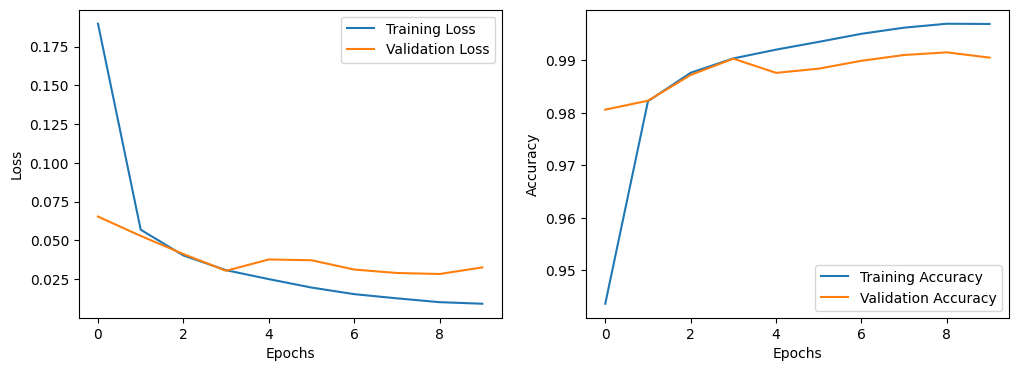

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers, optimizers
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Model architecture
def create_model(optimizer):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the model with custom Adam optimizer parameters
adam_optimizer_custom = optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8
)
model_custom = create_model(adam_optimizer_custom)

# Train the model
history_custom = model_custom.fit(train_images, train_labels, epochs=10, batch_size=64,
                                  validation_data=(test_images, test_labels))

# Plotting the training and validation metrics
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_custom.history['loss'], label='Training Loss')
plt.plot(history_custom.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_custom.history['accuracy'], label='Training Accuracy')
plt.plot(history_custom.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


#Reason for selecting Adam optimizer parameters value

**Learning Rate (alpha):** Setting this to 0.001 is a common starting point as it balances learning speed and stability. Larger values lead to faster initial learning, while smaller values slow down training significantly.

**Beta1:** Typically set to 0.9, it represents the exponential decay rate for the first moment estimate of the gradient. This value moderates the momentum effect, helping the optimizer converge more efficiently.

**Beta2:** set to 0.999, it controls the exponential decay rate for the second-moment estimate of the gradient.

**Epsilon:** This small number, set to 1e-8, prevents division by zero during calculations to ensure numerical stability in the optimizer's implementation